In [34]:
#### Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# This is new
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_absolute_error, r2_score
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

In [35]:
data_set = pd.read_csv('C:/Users/Huihao Xing/Desktop/近期文件/Kaggle/Advanced/dataset/train.csv')
data_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [36]:
data_set.columns

data_set.isna().sum()

data_set['SalePrice'].describe()

#sns.distplot(df_train['SalePrice']);


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

count     1,460.00
mean    180,921.20
std      79,442.50
min      34,900.00
25%     129,975.00
50%     163,000.00
75%     214,000.00
max     755,000.00
Name: SalePrice, dtype: float64

C:\Users\Huihao Xing\AppData\Local\Temp\ipykernel_31648\402427037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data_set.corr()


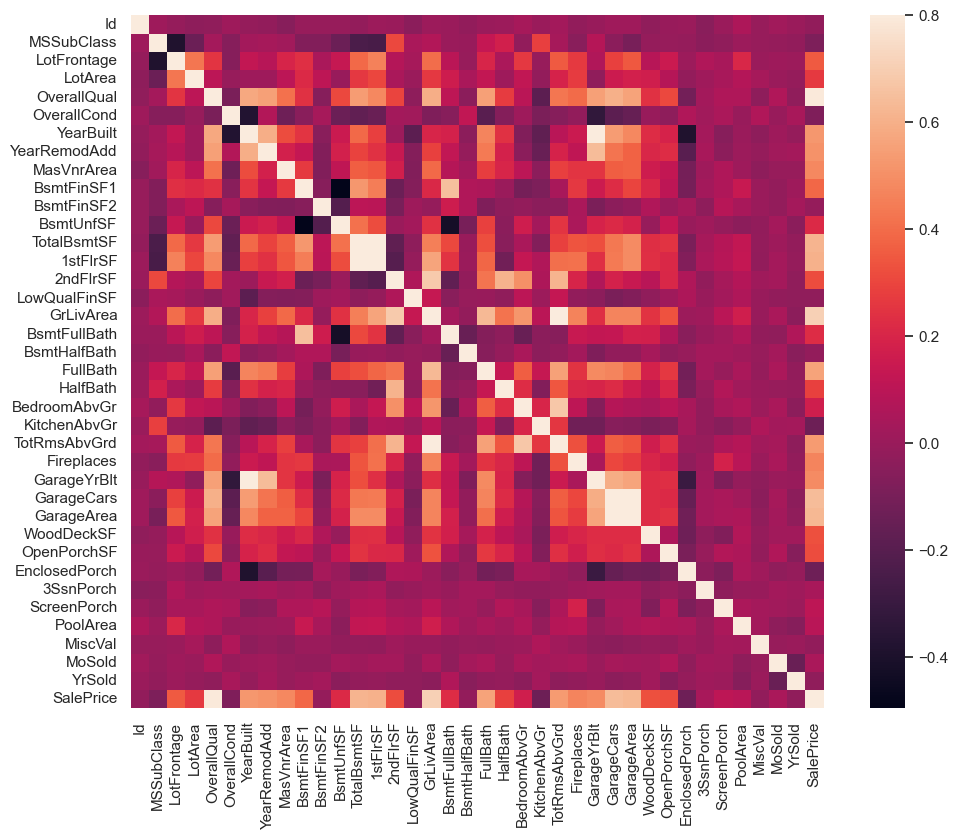

In [37]:
corrmat = data_set.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

C:\Users\Huihao Xing\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


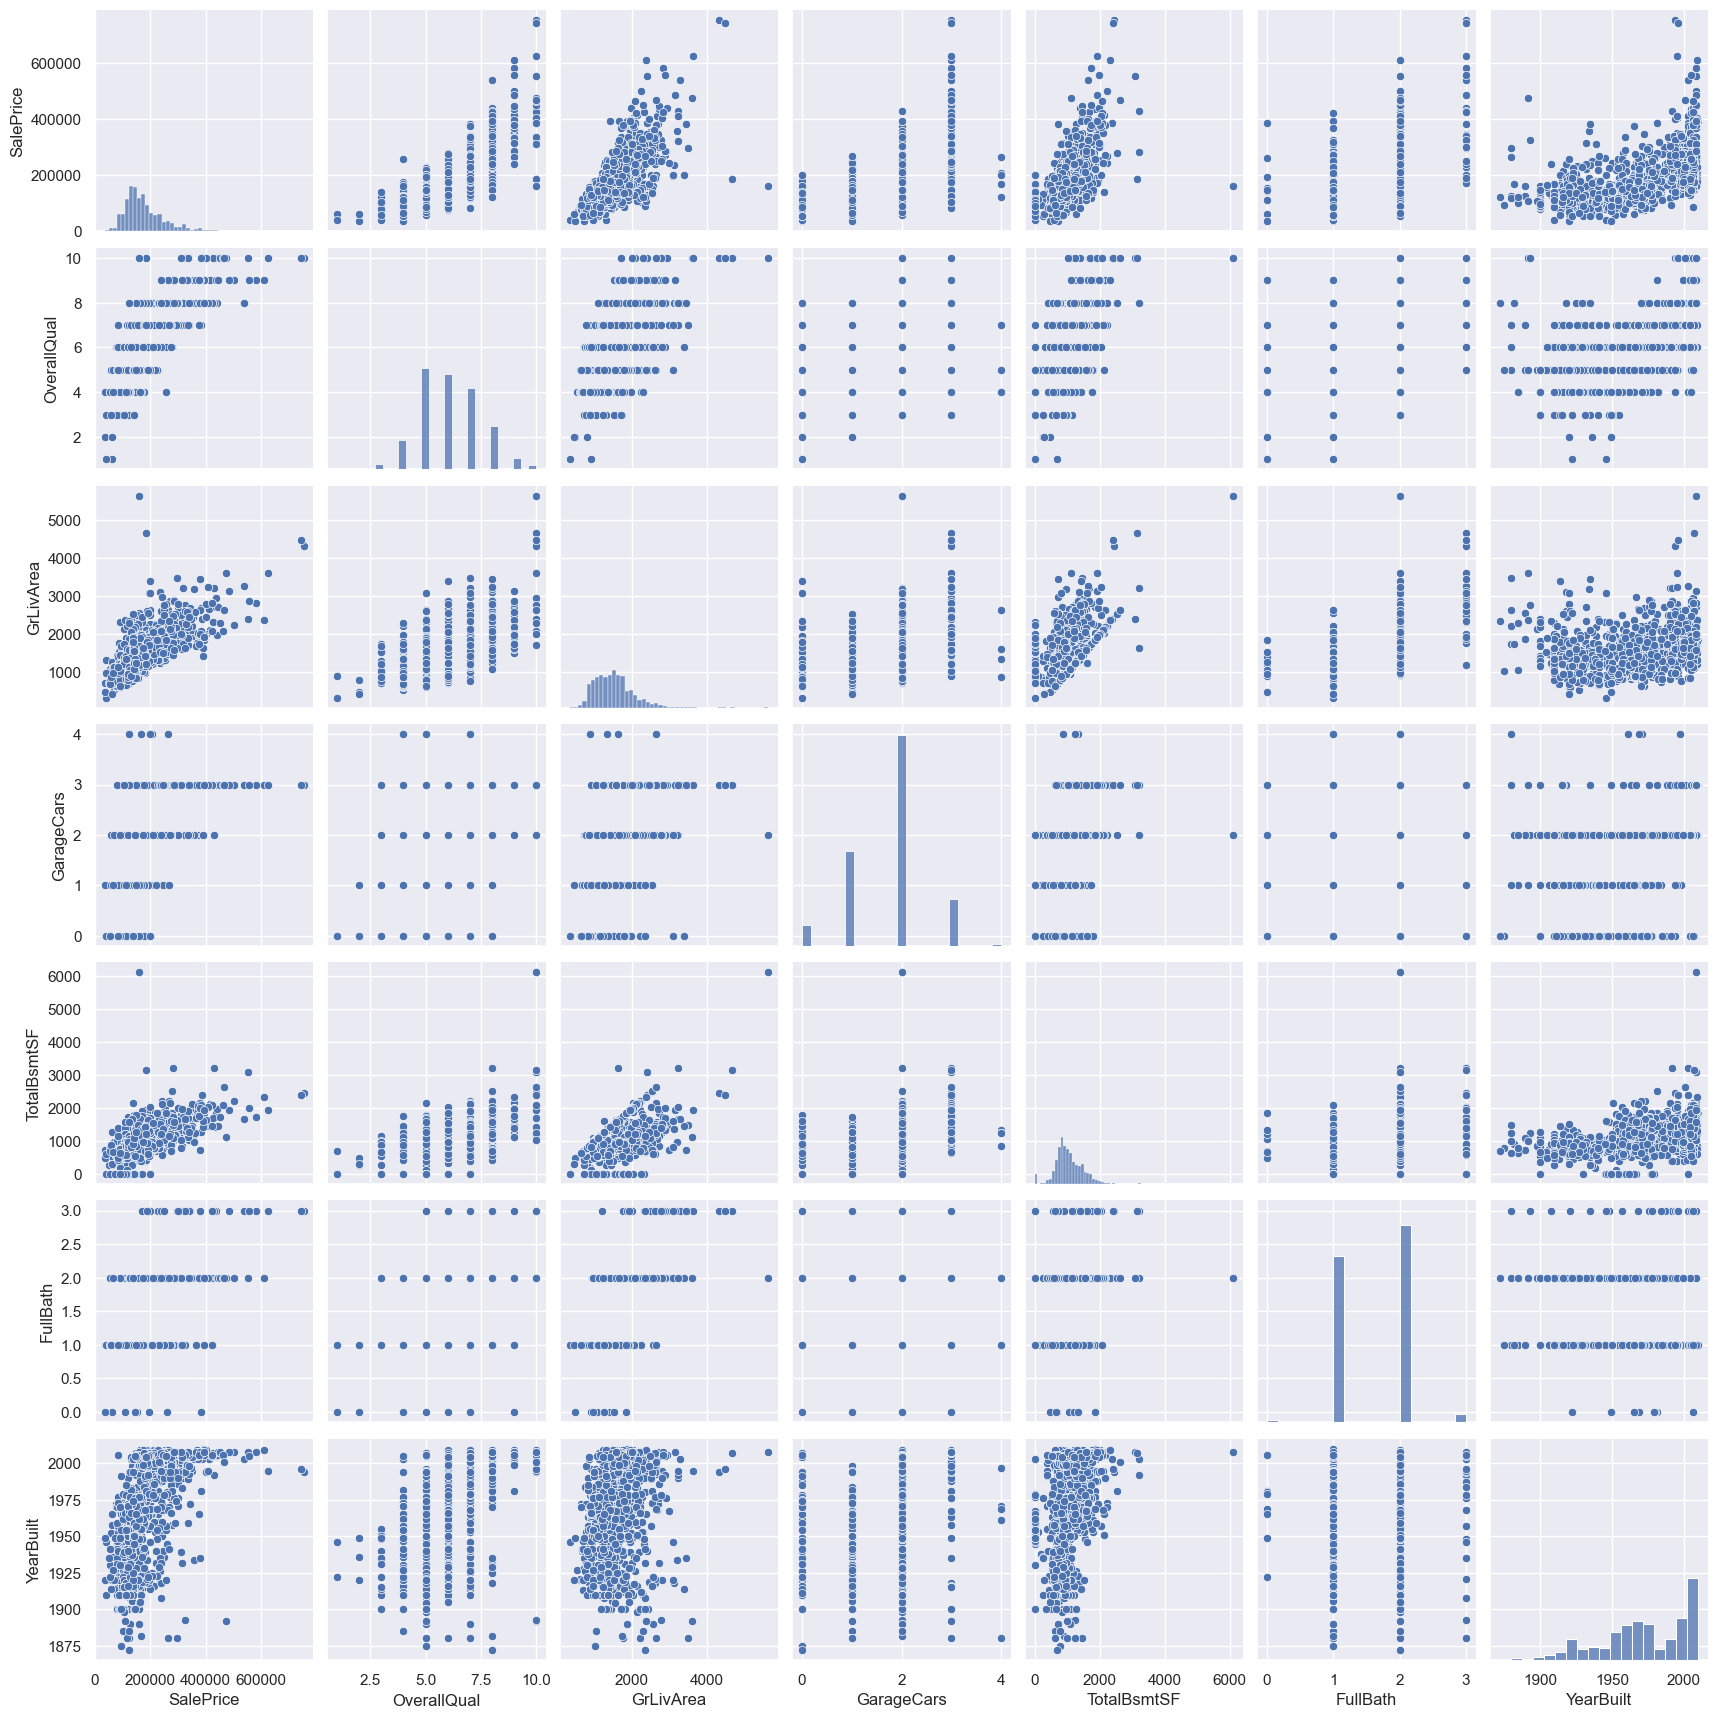

In [38]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data_set[cols], size = 2.5)
plt.show();

In [39]:
total = data_set.isnull().sum().sort_values(ascending=False)
percent = (data_set.isnull().sum()/data_set.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,1.00
MiscFeature,1406,0.96
Alley,1369,0.94
Fence,1179,0.81
FireplaceQu,690,0.47
LotFrontage,259,0.18
GarageYrBlt,81,0.06
GarageCond,81,0.06
GarageType,81,0.06
GarageFinish,81,0.06


In [40]:
data_set.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [41]:
data_set = data_set.drop(columns = ['PoolQC' , 'MiscFeature', 'Alley','Fence','FireplaceQu'])
data_set.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [42]:
data_set_1 = pd.get_dummies(data_set, columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig'
                                              ,'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle'
                                              ,'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual'
                                              ,'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1'
                                              ,'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual'
                                              ,'Functional','GarageType','GarageFinish','GarageQual','GarageCond'
                                              ,'PavedDrive','SaleType','SaleCondition'])

In [43]:
data_set_1 = data_set_1.dropna()

#garage area(0.62), garage Cars(0.64) TotRmsAbvGrd(0.53) GarageYrBlt(0.49) Fireplace (0.47) Fullbath(0.56) GrLivArea(0.71) 
#TotalBsMtSF(0.61) 1stFlrSf (0.61) MassVnrArea (0.48) YearRemodAdd(0.51) YearBuilt(0.52) OverallQual(0.80)\

In [44]:
X_features = data_set_1[['GarageArea','GarageCars','TotRmsAbvGrd','GarageYrBlt',
                        'Fireplaces','BsmtFullBath','GrLivArea','TotalBsmtSF','1stFlrSF','MasVnrArea','YearRemodAdd','YearBuilt','OverallQual']]
Y_features = data_set_1['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X_features, Y_features, test_size=0.33, random_state=50)

model = LinearRegression(fit_intercept = True)
model.fit(X_train, y_train) # When extending to multiple features remove .array.reshape(-1, 1)

# The following gives the R-square score
model.score(X_train, y_train) # When extending to multiple features remove .array.reshape(-1, 1)

# This is the coefficient Beta_1 (or slope of the Simple Linear Regression line)
model.coef_

# This is the coefficient Beta_0
model.intercept_

LinearRegression()

0.7746434077064187

array([ 6.44034202e+00,  1.91452500e+04, -4.70469006e+02, -6.86498708e+01,
        8.96975118e+03,  1.54891008e+04,  3.40287417e+01,  8.86423363e+00,
        5.09154774e+00,  4.70772433e+01,  3.93917093e+02,  8.93007086e+01,
        2.15505665e+04])

-892040.7536435137

In [45]:
# (a) Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

r_square = lr.score(X_train, y_train)
lr_predictions = lr.predict(X_test)
mae_lr = abs(y_test - lr_predictions).mean()
error_ratio_lr = mae_lr / y_test.mean()

print("R-squared (training):", r_square)
print("intercept:",lr.intercept_)
print("Mean Absolute Error (test):", mae_lr)
print("Error Ratio (Linear Regression):", error_ratio_lr)

# (b) Lasso Regression
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)

score_lasso = lasso.score(X_train, y_train)
intercept_lasso = lasso.intercept_
lasso_predictions = lasso.predict(X_test)
mae_lasso = mean_absolute_error(y_test, lasso_predictions)
error_ratio_lasso = mae_lasso / y_test.mean()

print("Score (Lasso):", score_lasso)
print("Intercept (Lasso):", intercept_lasso)
print("Mean Absolute Error (test):", mae_lasso)
print("Error Ratio (Lasso Regression):", error_ratio_lasso)

# (c) Bagging Regressor
bagging_regressor = BaggingRegressor(random_state=50, max_samples=10)
bagging_regressor.fit(X_train, y_train)

bagging_predictions = bagging_regressor.predict(X_test)
mae_bagging = mean_absolute_error(y_test, bagging_predictions)
error_ratio_bagging = mae_bagging / y_test.mean()

bagging_predictions_1 = bagging_regressor.predict(X_train)
mae_bagging_1 = mean_absolute_error(y_train, bagging_predictions_1)

print("Mean Absolute Error (test):", mae_bagging)
print("Mean Absolute Error (train):", mae_bagging_1)
print("Error Ratio (Bagging Regressor):", error_ratio_bagging)

# (d) Random Forest Regressor
random_forest_regressor = RandomForestRegressor(random_state=50, max_features='sqrt', min_samples_leaf=3)
random_forest_regressor.fit(X_train, y_train)
random_forest_predictions = random_forest_regressor.predict(X_test)
mae_random_forest = mean_absolute_error(y_test, random_forest_predictions)
error_ratio_random_forest = mae_random_forest / y_test.mean()

random_forest_predictions_1 = random_forest_regressor.predict(X_train)
mae_random_forest_1 = mean_absolute_error(y_train, random_forest_predictions_1)

print("Mean Absolute Error (test):", mae_random_forest)
print("Mean Absolute Error (train):", mae_random_forest_1)
print("Error Ratio (Random Forest Regressor):", error_ratio_random_forest)

# (e) Gradient Boosting Regressor
gradient_boosting_regressor = GradientBoostingRegressor(random_state=50, min_samples_split=6, min_samples_leaf=3, max_depth=4)
gradient_boosting_regressor.fit(X_train, y_train)
gradient_boosting_predictions = gradient_boosting_regressor.predict(X_test)
mae_gradient_boosting = mean_absolute_error(y_test, gradient_boosting_predictions)
error_ratio_gradient_boosting = mae_gradient_boosting / y_test.mean()

gradient_boosting_predictions_1 = gradient_boosting_regressor.predict(X_train)
mae_gradient_boosting_1 = mean_absolute_error(y_train, gradient_boosting_predictions_1)

print("Mean Absolute Error (test):", mae_gradient_boosting)
print("Mean Absolute Error (train):", mae_gradient_boosting_1)
print("Error Ratio (Gradient Boosting Regressor):", error_ratio_gradient_boosting)

LinearRegression()

R-squared (training): 0.7746434077064187
intercept: -892040.7536435137
Mean Absolute Error (test): 26531.13363553458
Error Ratio (Linear Regression): 0.14075809804329203


Lasso(alpha=0.05)

Score (Lasso): 0.7746434076990939
Intercept (Lasso): -892048.6310016101
Mean Absolute Error (test): 26531.07944008839
Error Ratio (Lasso Regression): 0.1407578105151361


BaggingRegressor(max_samples=10, random_state=50)

Mean Absolute Error (test): 35704.56135135135
Mean Absolute Error (train): 33246.76671105193
Error Ratio (Bagging Regressor): 0.18942673978148636


RandomForestRegressor(max_features='sqrt', min_samples_leaf=3, random_state=50)

Mean Absolute Error (test): 22851.702686904086
Mean Absolute Error (train): 12805.187420636477
Error Ratio (Random Forest Regressor): 0.12123726982217185


GradientBoostingRegressor(max_depth=4, min_samples_leaf=3, min_samples_split=6,
                          random_state=50)

Mean Absolute Error (test): 21607.785796462675
Mean Absolute Error (train): 9045.265710661937
Error Ratio (Gradient Boosting Regressor): 0.11463780151343929


In [46]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Load the training and test data
train_data = pd.read_csv('C:/Users/Huihao Xing/Desktop/近期文件/Kaggle/Advanced/dataset/train.csv')
test_data = pd.read_csv('C:/Users/Huihao Xing/Desktop/近期文件/Kaggle/Advanced/dataset/test.csv')

# Separate the target variable
y_train = train_data['SalePrice']

# Features for training and testing
X_train = train_data[['GarageArea', 'GarageCars', 'TotRmsAbvGrd', 'GarageYrBlt', 'Fireplaces', 'BsmtFullBath',
                      'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'MasVnrArea', 'YearRemodAdd', 'YearBuilt', 'OverallQual']]
X_test = test_data[['GarageArea', 'GarageCars', 'TotRmsAbvGrd', 'GarageYrBlt', 'Fireplaces', 'BsmtFullBath',
                    'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'MasVnrArea', 'YearRemodAdd', 'YearBuilt', 'OverallQual']]
ids = test_data['Id']

# Create an imputer object
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the RandomForestRegressor on the imputed training data
random_forest_regressor = RandomForestRegressor(random_state=42)
random_forest_regressor.fit(X_train_imputed, y_train)

# Predict using the trained RandomForestRegressor model on the imputed test data
preds = random_forest_regressor.predict(X_test_imputed)

# Create a DataFrame for the submission file
#output = pd.DataFrame({'Id': ids, 'SalePrice': preds})

# Save the submission file
#output.to_csv('/kaggle/working/submission.csv', index=False)


RandomForestRegressor(random_state=42)